In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# the error metric. In this case. We will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

In [2]:
sales_m = pd.read_pickle('sales_m_lag_12_with_Holidays')

In [3]:
lag_variables  = ['item_id_enc_item_price_avg', 'item_id_enc_item_cnt_day_sum',
       'item_id_enc_item_cnt_day_avg', 'shop_id_enc_item_price_avg',
       'shop_id_enc_item_cnt_day_sum', 'shop_id_enc_item_cnt_day_avg',
       'item_category_id_enc_item_price_avg',
       'item_category_id_enc_item_cnt_day_sum',
       'item_category_id_enc_item_cnt_day_avg',
    'item_cnt_day']
cols_to_drop = lag_variables[:-1] + ['item_price']

In [4]:
X_train = sales_m[sales_m['date_block_num']<33].drop(cols_to_drop, axis=1)
X_val =  sales_m[sales_m['date_block_num']==33].drop(cols_to_drop, axis=1)
X_test = sales_m[sales_m['date_block_num']==34].drop(cols_to_drop, axis=1)

In [5]:
X_train.drop(['item_name','item_category_name'], axis=1,inplace=True)
X_val.drop(['item_name','item_category_name'], axis=1,inplace=True)
X_test.drop(['item_name','item_category_name'], axis=1,inplace=True)

In [6]:
X_train['item_cnt_day'].clip_upper(20, inplace=True)
X_train['item_cnt_day'].clip_lower(0, inplace=True)

X_val['item_cnt_day'].clip_upper(20, inplace=True)
X_val['item_cnt_day'].clip_lower(0, inplace=True)

X_test['item_cnt_day'].clip_upper(20, inplace=True)
X_test['item_cnt_day'].clip_lower(0, inplace=True)

In [7]:
cols = [c for c in X_train.columns if c not in ['date_block_num', 'item_cnt_day',]]
x1 = X_train[cols]
y1 = X_train['item_cnt_day']
x2 = X_val[cols]
y2 = X_val['item_cnt_day']

In [10]:
numeric_variables = list(x1.dtypes[x1.dtypes !="object"].index)

In [12]:
x1[numeric_variables].head()

,shop_id,item_id,item_category_id,item_id_enc_item_price_avg_lag_1_x,item_id_enc_item_cnt_day_sum_lag_1_x,item_id_enc_item_cnt_day_avg_lag_1_x,shop_id_enc_item_price_avg_lag_1_x,shop_id_enc_item_cnt_day_sum_lag_1_x,shop_id_enc_item_cnt_day_avg_lag_1_x,item_category_id_enc_item_price_avg_lag_1_x,...,shop_id_enc_item_cnt_day_avg_lag_12,item_category_id_enc_item_price_avg_lag_12,item_category_id_enc_item_cnt_day_sum_lag_12,item_category_id_enc_item_cnt_day_avg_lag_12,item_cnt_day_lag_12,December,Newyear_Xmas,Valentine_MenDay,WomenDay,Easter_Labor
4488710,54,10297,37,189.887329,0.408451,0.408451,213.720200,0.982407,0.982407,52.873695,...,0.0,115.765045,0.0,0.0,0.0,0,1,0,0,0
4488711,54,10296,38,738.000000,0.615385,0.615385,213.722565,0.982418,0.982418,126.015518,...,0.0,115.765045,0.0,0.0,0.0,0,1,0,0,0
4488712,54,10298,40,344.190796,14.136752,14.136752,213.726105,0.982429,0.982429,29.325655,...,0.0,115.765045,0.0,0.0,0.0,0,1,0,0,0
4488713,54,10300,37,481.066193,3.829060,3.829060,213.728088,0.982648,0.982648,52.875359,...,0.0,115.765045,0.0,0.0,0.0,0,1,0,0,0
4488714,54,10284,57,32.997707,0.135321,0.135321,219.066513,1.014041,1.014041,25.144424,...,0.0,115.765045,0.0,0.0,0.0,0,1,0,0,0


In [13]:
y_test = list(X_train['item_cnt_day'].values)

In [14]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

In [16]:
model.fit(x1[numeric_variables],y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [26]:
from sklearn.externals import joblib
joblib.dump(model, 'RF1.pkl') 
#model = joblib.load('RF1.pkl')  # to load the model

['RF1.pkl']

In [27]:
model.oob_score_

0.57448755917565908

In [52]:
model.feature_importances_

array([ 0.05337229,  0.13357513,  0.03332268,  0.00919769,  0.00688758,
        0.00658386,  0.00787753,  0.00516446,  0.00517751,  0.00932814,
        0.00567698,  0.00553919,  0.17023894,  0.00359817,  0.00242735,
        0.00248341,  0.00296245,  0.00259339,  0.00242387,  0.00376894,
        0.00299728,  0.00308148,  0.01218675,  0.0025066 ,  0.00170588,
        0.00171617,  0.00205145,  0.00129271,  0.00131902,  0.0024346 ,
        0.00171395,  0.0017279 ,  0.01165318,  0.00200556,  0.00129939,
        0.0012974 ,  0.00174172,  0.00104176,  0.00104697,  0.00187746,
        0.00130029,  0.00131853,  0.00268833,  0.0017484 ,  0.00116386,
        0.00116622,  0.00153115,  0.00097807,  0.00101347,  0.00170251,
        0.00123178,  0.001278  ,  0.00372276,  0.00201466,  0.00121241,
        0.00113591,  0.00149368,  0.00112032,  0.00114286,  0.00180699,
        0.00133951,  0.00139031,  0.00345091,  0.00200021,  0.00116496,
        0.00115508,  0.00160161,  0.00097653,  0.00094184,  0.00

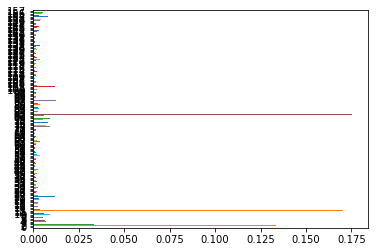

In [55]:
# Simple version that shows all of the variables
# it shows the impact(importance) of each columns in the results
feature_importances = pd.Series(model.feature_importances_)#, index=x1.columns
feature_importances.sort_values()
feature_importances.plot(kind="barh");#,figsize=(7,6)

In [57]:
print(model.score(x1[numeric_variables],y_test))

0.941504994804


In [59]:
import os
DATA_FOLDER = './DataSet/'
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

In [61]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [64]:
pred_forest = model.predict(x2)